
Aim:To Predict The Car Prices From the Given Data

Importing,Analyzing and Cleaning the Data

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
trainData = pd.read_excel("/content/Data_Train.xlsx")
testData = pd.read_excel("/content/Data_Test.xlsx")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [172]:
#Checking Number of Features In Datasets
print("\n\nNumber of features in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20, len(trainData.columns))
print("\nTest Set : \n",'-' * 20,len(testData.columns))



Number of features in the datasets :
 ########################################

Training Set : 
 -------------------- 12

Test Set : 
 -------------------- 11


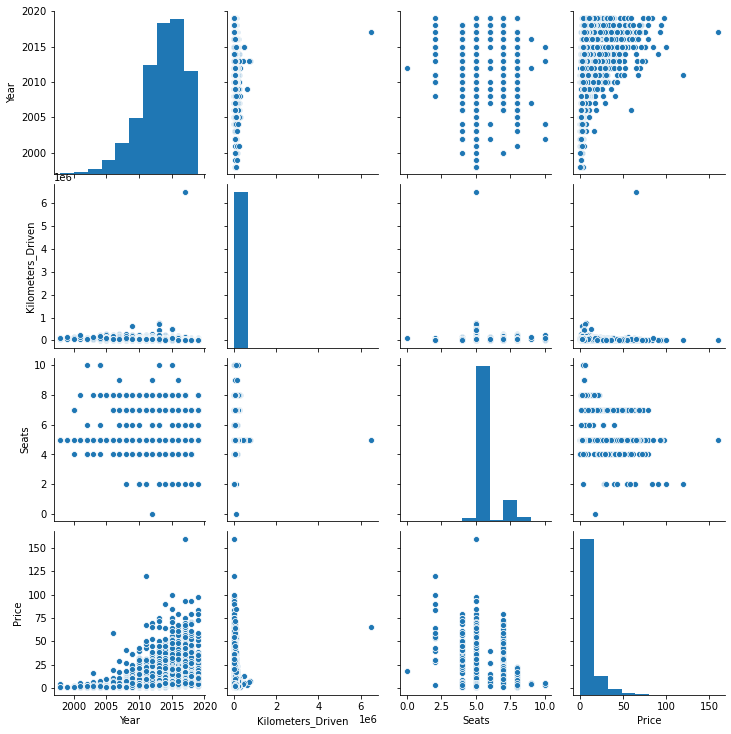

In [173]:
#Pair Plot
sns.pairplot(trainData)

In [146]:
#checking the features in the Datasets
print("\n\nFeatures in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20, list(trainData.columns))
print("\nTest Set : \n",'-' * 20,list(testData.columns))



Features in the datasets :
 ########################################

Training Set : 
 -------------------- ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

Test Set : 
 -------------------- ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']


In [147]:
#checking the data types of features
print("\n\nDatatypes of features in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,"\n", trainData.dtypes)
print("\nTest Set : \n",'-' * 20,"\n",testData.dtypes)



Datatypes of features in the datasets :
 ########################################

Training Set : 
 -------------------- 
 Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

Test Set : 
 -------------------- 
 Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object


In [148]:
#checking the number of rows
print("\n\nNumber of observations in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,len(trainData))
print("\nTest Set : \n",'-' * 20,len(testData))



Number of observations in the datasets :
 ########################################

Training Set : 
 -------------------- 6019

Test Set : 
 -------------------- 1234


In [149]:
#checking for NaNs or empty cells
print("\n\nEmpty cells or Nans in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,trainData.isnull().values.any())
print("\nTest Set : \n",'-' * 20,testData.isnull().values.any())



Empty cells or Nans in the datasets :
 ########################################

Training Set : 
 -------------------- True

Test Set : 
 -------------------- True


In [150]:
#checking for NaNs or empty cells by features
print("\n\nNumber of empty cells or Nans in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,"\n", trainData.isnull().sum())
print("\nTest Set : \n",'-' * 20,"\n",testData.isnull().sum())



Number of empty cells or Nans in the datasets :
 ########################################

Training Set : 
 -------------------- 
 Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Test Set : 
 -------------------- 
 Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64


EXPLORING CATEGORICAL FEATURES

In [0]:
#assingning variables
all_brands = list(trainData.Name)
all_locations = list(trainData.Location)
all_fuel_types = list(trainData.Fuel_Type)
all_transmissions = list(trainData.Transmission)
all_owner_types = list(trainData.Owner_Type)

CLEANING THE DATA

In [0]:
#Splitting Name Into Following Features: Brand and Model
#Train Data
names = list(trainData.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
trainData["Brand"] =  brand
trainData["Model"] = model
trainData.drop(labels = ['Name'], axis = 1, inplace = True)

In [0]:
#Test Data
names = list(testData.Name)
brand = []
model = []
for i in range(len(names)):
   try:
       brand.append(names[i].split(" ")[0].strip())
       try:
           model.append(" ".join(names[i].split(" ")[1:]).strip())
       except:
           pass
   except:
       print("ERR ! - ", names[i], "@" , i)
testData["Brand"] =  brand
testData["Model"] = model
testData.drop(labels = ['Name'], axis = 1, inplace = True)

In [0]:
#Mileage
#Converting Text to integers 


#Train Data
mileage = list(trainData.Mileage)
for i in range(len(mileage)):
   try :
       mileage[i] = float(mileage[i].split(" ")[0].strip())
   except:
       mileage[i] = np.nan
trainData['Mileage'] = mileage

#Test Data
mileage = list(testData.Mileage)
for i in range(len(mileage)):
   try :
       mileage[i] = float(mileage[i].split(" ")[0].strip())
   except:
       mileage[i] = np.nan
testData['Mileage'] = mileage

In [0]:
#Engine
#Converting Text to integers 

#Train Data
engine = list(trainData.Engine)
for i in range(len(engine)):
   try :
       engine[i] = int(engine[i].split(" ")[0].strip())
   except:
       engine[i] = np.nan
trainData['Engine'] = engine

#Test Data
engine = list(testData.Engine)
for i in range(len(engine)):
   try :
       engine[i] = int(engine[i].split(" ")[0].strip())
   except:
       engine[i] = np.nan
testData['Engine'] = engine


In [0]:
#Power
#Converting Text to integers

#Train Data
power = list(trainData.Power)
for i in range(len(power)):
   try :
       power[i] = float(power[i].split(" ")[0].strip())
   except:
       power[i] = np.nan
trainData['Power'] = power

#Test Data
power = list(testData.Power)
for i in range(len(power)):
   try :
       power[i] = float(power[i].split(" ")[0].strip())
   except:
       power[i] = np.nan
testData['Power'] = power

ReOrdering The DataSet

In [0]:
trainData = trainData[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]
testData = testData[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

Data Pre-Processing

Encoding Categorical Variables

In [158]:
trainData.dtypes

Brand                 object
Model                 object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [0]:
#Following are the Unique Categories  found in the Data
#1.Brand
#2.Model
#3.Location
#4.Fuel Type
#5.Transmission
#6.Owner Type

all_brands = list(set(list(trainData.Brand) + list(testData.Brand)))
all_models = list(set(list(trainData.Model) + list(testData.Model)))
all_locations = list(set(list(trainData.Location) + list(testData.Location)))
all_fuel_types = list(set(list(trainData.Fuel_Type) + list(testData.Fuel_Type)))
all_transmissions = list(set(list(trainData.Transmission) + list(testData.Transmission)))
all_owner_types = list(set(list(trainData.Owner_Type) + list(testData.Owner_Type)))

In [0]:
#Using Label Encoders and Fitting the Categories

from sklearn.preprocessing import LabelEncoder
le_brands = LabelEncoder()
le_models = LabelEncoder()
le_locations = LabelEncoder()
le_fuel_types = LabelEncoder()
le_transmissions = LabelEncoder()
le_owner_types = LabelEncoder()

In [161]:
#Fitting the Categories

le_brands.fit(all_brands)
le_models.fit(all_models)
le_locations.fit(all_locations)
le_fuel_types.fit(all_fuel_types)
le_transmissions.fit(all_transmissions)
le_owner_types.fit(all_owner_types)

LabelEncoder()

In [0]:
#Applying encoding to Training Data

trainData['Brand'] = le_brands.transform(trainData['Brand'])
trainData['Model'] = le_models.transform(trainData['Model'])
trainData['Location'] = le_locations.transform(trainData['Location'])
trainData['Fuel_Type'] = le_fuel_types.transform(trainData['Fuel_Type'])
trainData['Transmission'] = le_transmissions.transform(trainData['Transmission'])
trainData['Owner_Type'] = le_owner_types.transform(trainData['Owner_Type'])

#Applying encoding to Test_set data
testData['Brand'] = le_brands.transform(testData['Brand'])
testData['Model'] = le_models.transform(testData['Model'])
testData['Location'] = le_locations.transform(testData['Location'])
testData['Fuel_Type'] = le_fuel_types.transform(testData['Fuel_Type'])
testData['Transmission'] = le_transmissions.transform(testData['Transmission'])
testData['Owner_Type'] = le_owner_types.transform(testData['Owner_Type'])

In [163]:
trainData.head()   #All the texts are now converted to numbers

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,19,1797,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,11,498,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,10,993,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,19,676,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,1,105,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


*Identifying Missing Values*

In [0]:
#Classinfying Predictor Variables for prediction purposes and Target Variables for modeling

# Dependent Variable
Y_train_data = trainData.iloc[:, -1].values

# Independent Variables
X_train_data = trainData.iloc[:,0 : -1].values

# Independent Variables for test Set
X_test = testData.iloc[:,:].values

In [0]:
#Fitting the imputer to tackle missing Values

from sklearn.impute import SimpleImputer

#Training Set Imputation
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X_train_data[:,8:12])
X_train_data[:,8:12] = imputer.transform(X_train_data[:,8:12])

#Test_set Imputation
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X_test[:,8:12])
X_test[:,8:12] = imputer.transform(X_test[:,8:12])

*splitting Training Data into Training and Validation Sets*

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train_data, Y_train_data, test_size = 0.2, random_state = 1)

*Scaling The Data*

In [0]:
#Scaling/Normalizing the features in data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Scaling Original Training Data
X_train_data = sc.fit_transform(X_train_data)

#Reshaping vector to array for transforming
Y_train_data = Y_train_data.reshape((len(Y_train_data), 1))
Y_train_data = sc.fit_transform(Y_train_data)
#converting back to vector
Y_train_data = Y_train_data.ravel()

X_test = sc.transform(X_test)

# Scaling Splitted training and val sets
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

#Reshaping vector to array for transforming
Y_train = Y_train.reshape((len(Y_train), 1))
Y_train = sc.fit_transform(Y_train)
#converting back to vector
Y_train = Y_train.ravel()

Testing the Model on Validation Set

In [168]:
#Calculating Accuracy
def score(y_pred, y_true):
   error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
   score = 1 - error
   return score

#The actual recordings to be tested against
y_true = Y_val

#Using Simple Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = sc.inverse_transform(lr.predict(X_val))
for i in range(len(Y_pred)):
   if Y_pred[i] < 0:
       Y_pred[i] = 0

print("\nLinear Regression SCORE : ", score(Y_pred, y_true))


Linear Regression SCORE :  0.763433258668093


Predicting The Price For Test Set

In [0]:
#Initializing a new regressor
lr2 = LinearRegression()

#Fitting the regressor with complete training data(X_train_data,Y_train_data)
lr2.fit(X_train_data,Y_train_data)

#Predicting the target(Price) for predictors in the test data
Y_pred2 = sc.inverse_transform(lr2.predict(X_test))

#Eliminating negative values in prediction for score calculation
for i in range(len(Y_pred2)):
   if Y_pred2[i] < 0:
       Y_pred2[i] = 0

#Saving the predictions to the excel sheet
pd.DataFrame(Y_pred2, columns = ['Price']).to_excel("PricesPredictions.xlsx")

The Predictions of the Prices have been Exported to the excel Sheet with name
PricesPredictions.xlsx